In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import landscape_simulation as land_sim

# PMoveSTIR workflow

We are going to explore the steps of the workflow on the PA, Tresure Lake data to gain familiarity with each step of the workflow

## Part 1: Building the landscape

This part requires getting the parameters, movement data, geospatial data, etc. sorted so that we can actually build a movement-informed epidemiological landscape.  The key steps are outlined below

## Part 2: Analyzing the landscape

Once we have the landscape built, we can begin performing analytical and simulation-based analyses on the landscapes. These could be R0 analyses, netwrok analyses, SEIR based simulations.  Ideally, we want to compare the epidemiological properties of the landscapes among populations.  We will need to think about the best way to do this.

## Part 1: Build the landscape

## Step 1: Estimate season-specific, individual specific UDs

This first step is done through the function `generate_UDs.py`.  This function generates individual and season-specific utilization distributions for all individuals in the dataset. The seasons are defined based on the seasonal stories of each site as **stationarity is assumed within each season**.  This might not be a relevant assumption for some of the sites.

1. You will need to update the filename to be the movement data that you want.
2. Make sure the data has columns names, at a minimum
    - 't_', 'x_', 'y_', 'animal_id'. The names will need to be consistent for all movement data files
    - The movement data needs to be cleaned as well. 
3. You will need to update `load_and_clean_data` to be a bit more generic such that it works on all data files.
4. The script outputs UDs to the folder `results/host_uds`.  These pickled files contain the utilization distribution for each individual.

## Explore the estimated utilization distributions

In [68]:
ud_files

['../results/host_uds/PSU013-PSU014F_ud_all_season=Fawning_year=2024.pkl',
 '../results/host_uds/PSU051-PSU052F_ud_all_season=Gestation_year=2024.pkl',
 '../results/host_uds/PSU005-PSU006F_ud_all_season=Gestation_year=2024.pkl',
 '../results/host_uds/PSU037-PSU038M_ud_all_season=Lactation_year=2024.pkl',
 '../results/host_uds/PSU075-PSU076F_ud_all_season=Gestation_year=2024.pkl',
 '../results/host_uds/PSU019-PSU020F_ud_all_season=Lactation_year=2024.pkl',
 '../results/host_uds/PSU057-PSU058M_ud_all_season=Gestation_year=2024.pkl',
 '../results/host_uds/PSU001-PSU002F_ud_all_season=Fawning_year=2024.pkl',
 '../results/host_uds/PSU021-PSU022F_ud_all_season=Gestation_year=2024.pkl',
 '../results/host_uds/PSU031-PSU032F_ud_all_season=Lactation_year=2024.pkl',
 '../results/host_uds/PSU003-PSU004M_ud_all_season=Fawning_year=2024.pkl',
 '../results/host_uds/PSU007-PSU008F_ud_all_season=Fawning_year=2024.pkl',
 '../results/host_uds/PSU073-PSU074F_ud_all_season=Gestation_year=2024.pkl',
 '../re

In [72]:
uds

{'XYZ': (array([[688946.04472973, 688956.04472973, 688966.04472973, ...,
          691996.04472973, 692006.04472973, 692016.04472973],
         [688946.04472973, 688956.04472973, 688966.04472973, ...,
          691996.04472973, 692006.04472973, 692016.04472973],
         [688946.04472973, 688956.04472973, 688966.04472973, ...,
          691996.04472973, 692006.04472973, 692016.04472973],
         ...,
         [688946.04472973, 688956.04472973, 688966.04472973, ...,
          691996.04472973, 692006.04472973, 692016.04472973],
         [688946.04472973, 688956.04472973, 688966.04472973, ...,
          691996.04472973, 692006.04472973, 692016.04472973],
         [688946.04472973, 688956.04472973, 688966.04472973, ...,
          691996.04472973, 692006.04472973, 692016.04472973]]),
  array([[4559945.75242148, 4559945.75242148, 4559945.75242148, ...,
          4559945.75242148, 4559945.75242148, 4559945.75242148],
         [4559955.75242148, 4559955.75242148, 4559955.75242148, ...,
      

Text(0.5, 1.0, 'PSU013-PSU014F_ud_all_season=Fawning_year=2024.pkl')

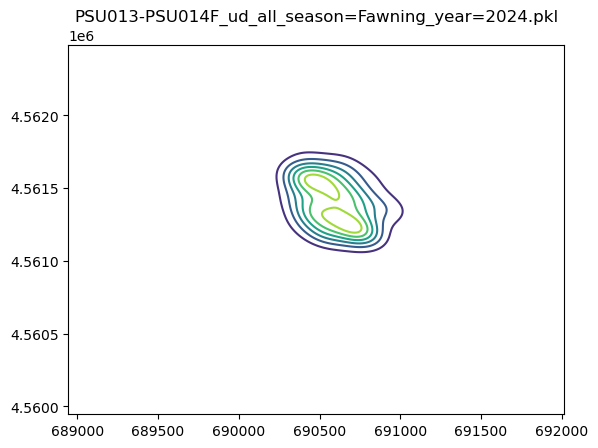

In [74]:

uds = pd.read_pickle(ud_files[0])
X, Y, Z = uds['XYZ']
plt.contour(X, Y, Z)
plt.title(os.path.basename(ud_files[0]))

/var/folders/4k/1wymgyj119ldyv4w2nc7py400000gn/T/ipykernel_2179/2148815628.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


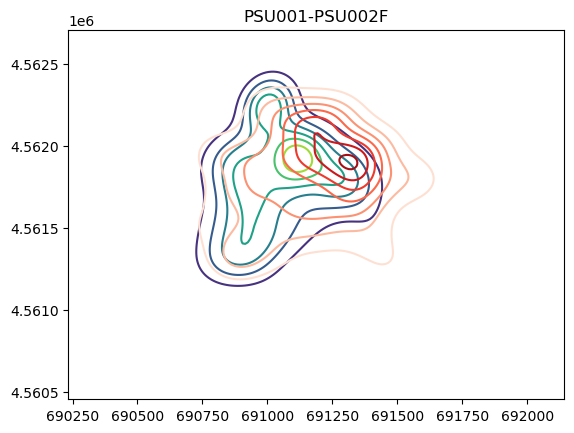

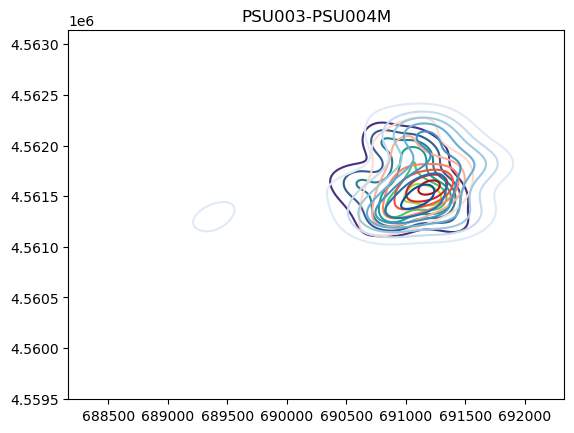

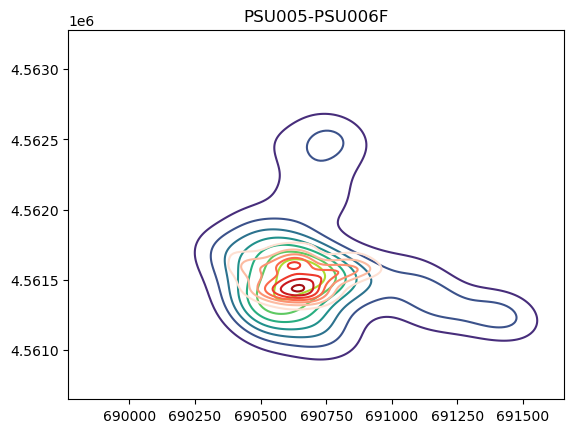

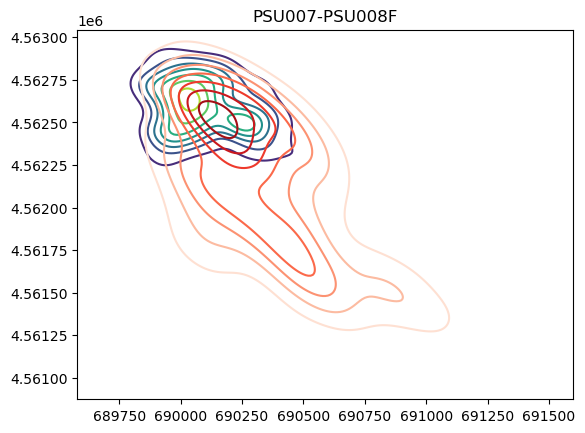

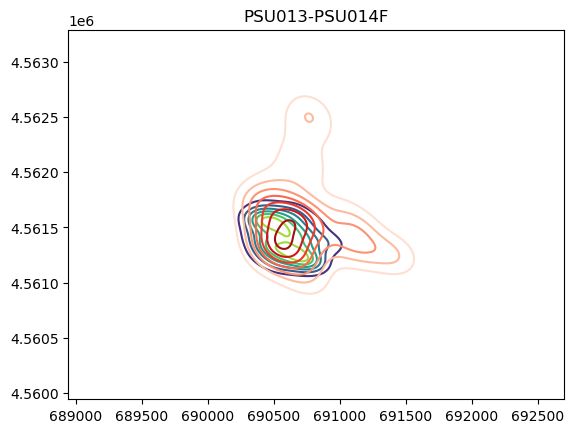

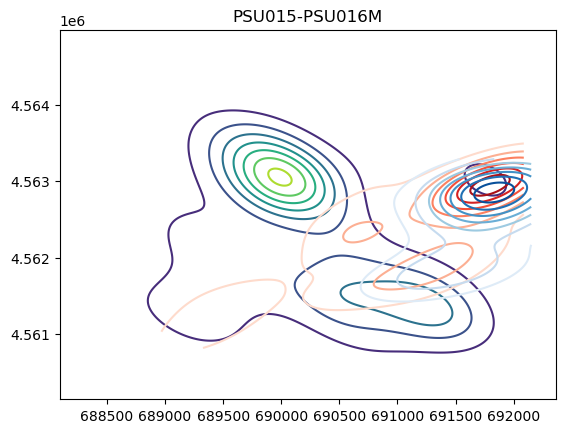

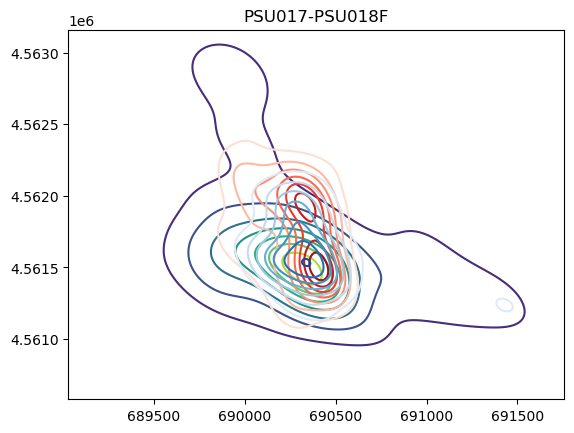

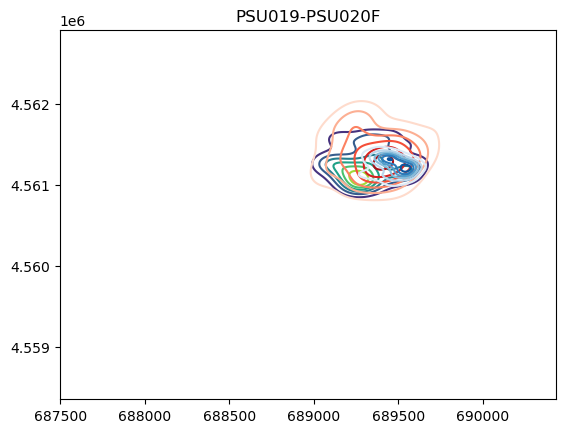

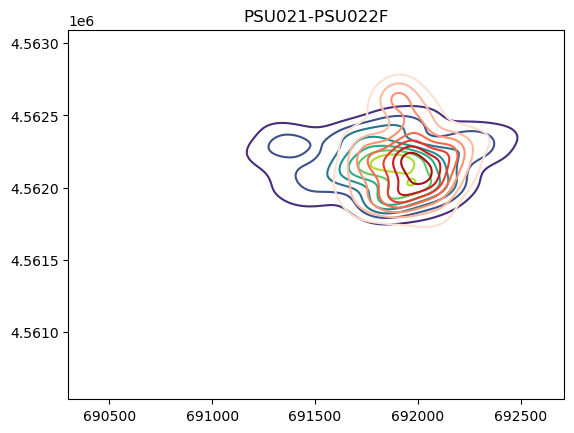

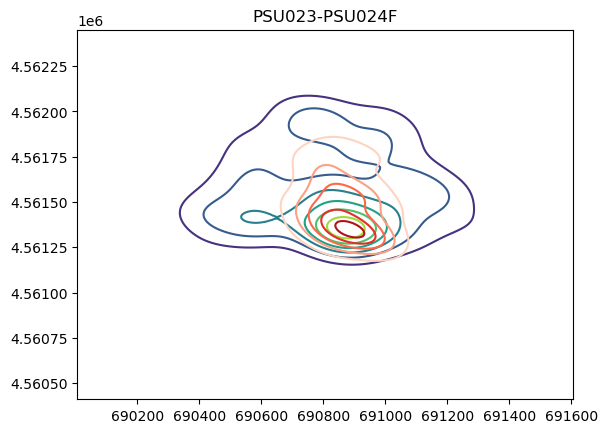

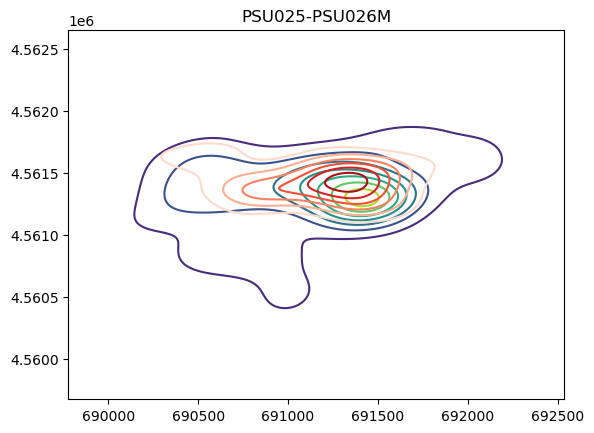

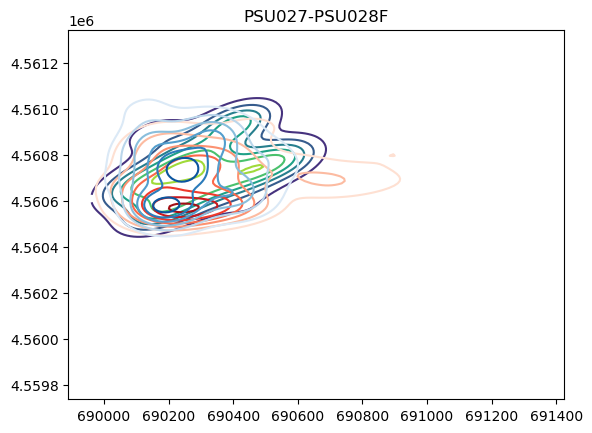

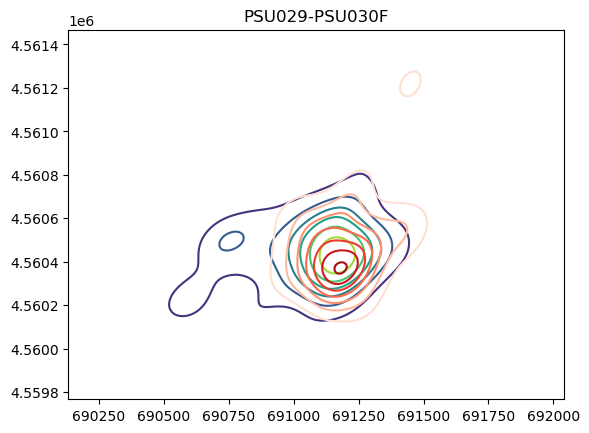

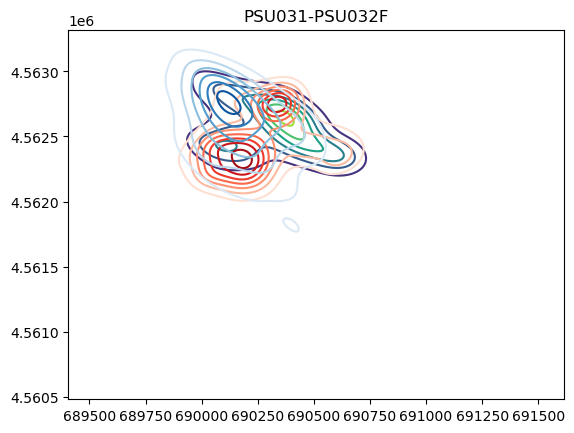

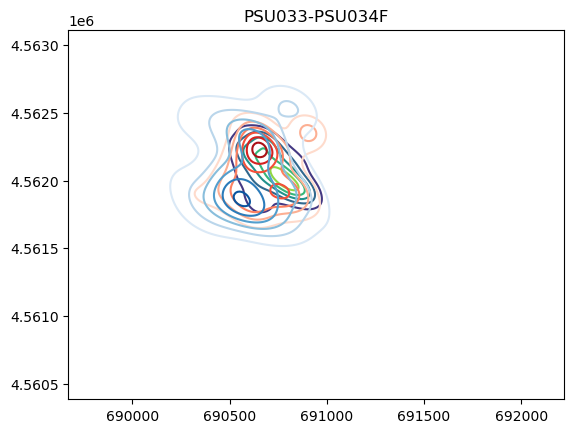

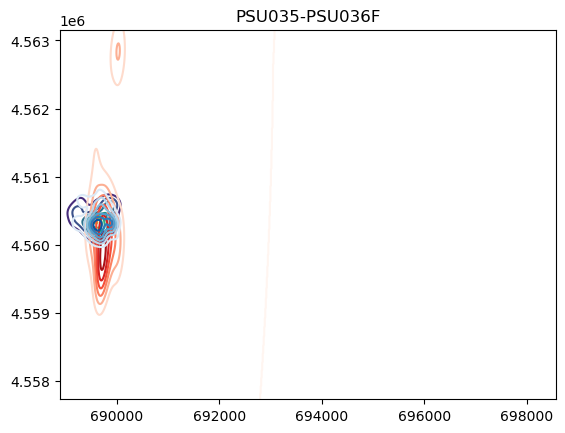

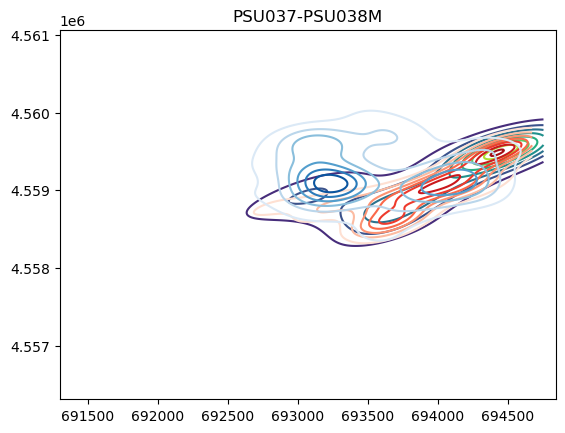

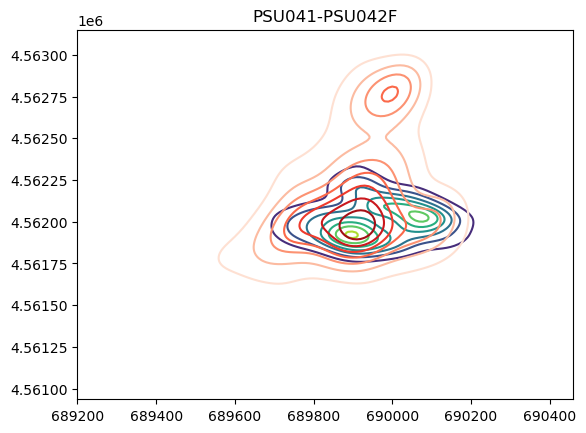

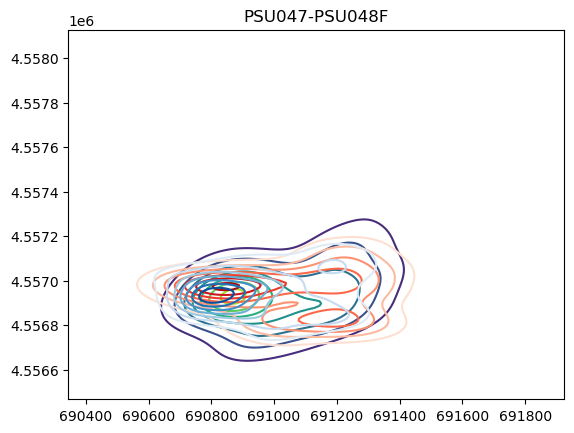

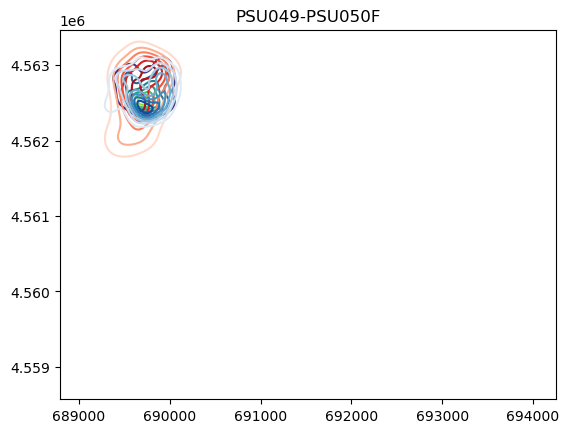

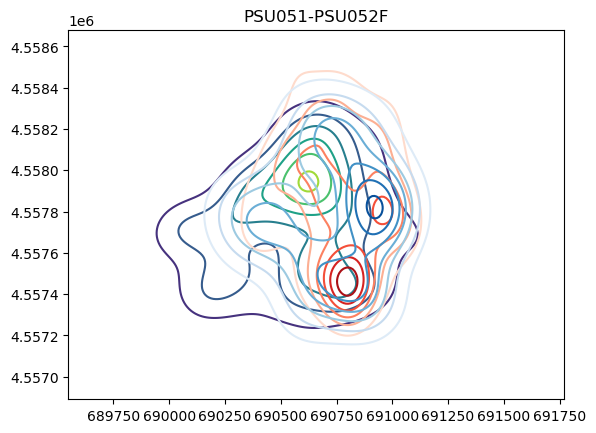

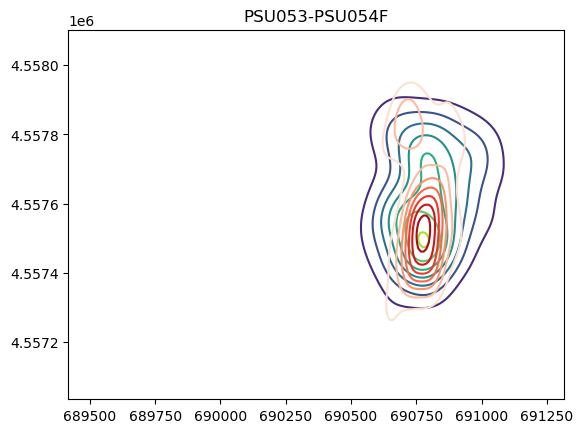

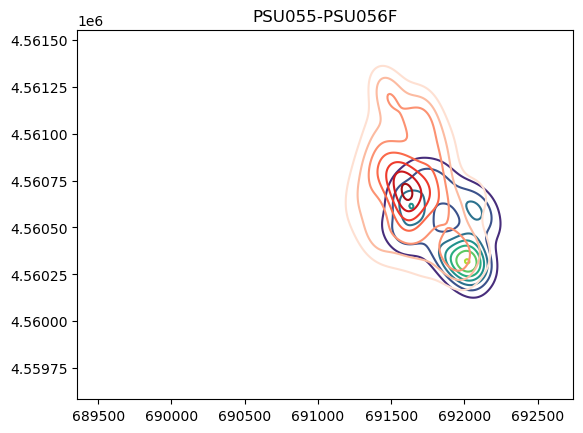

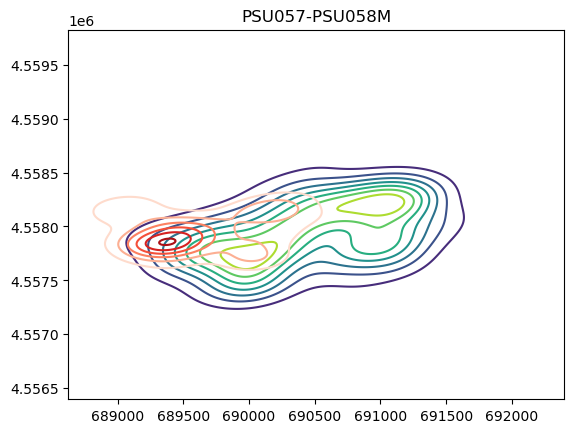

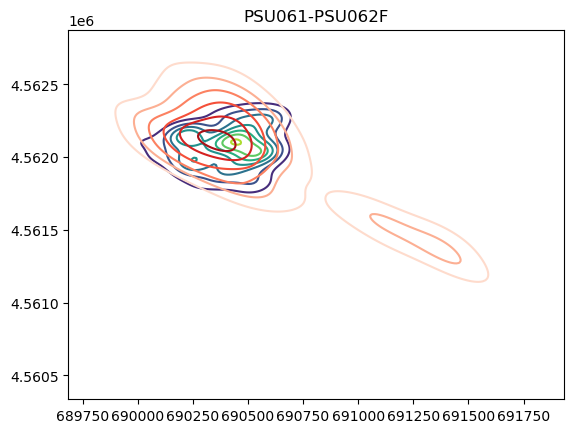

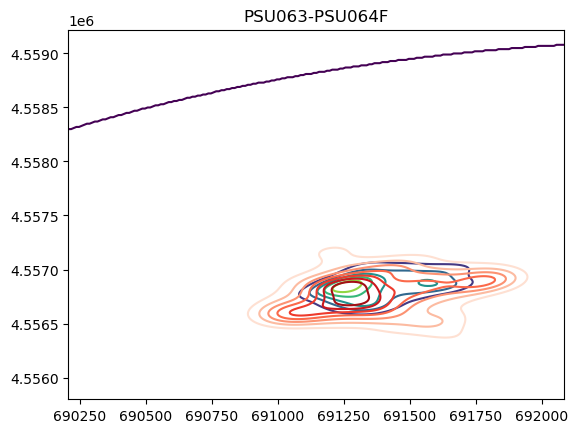

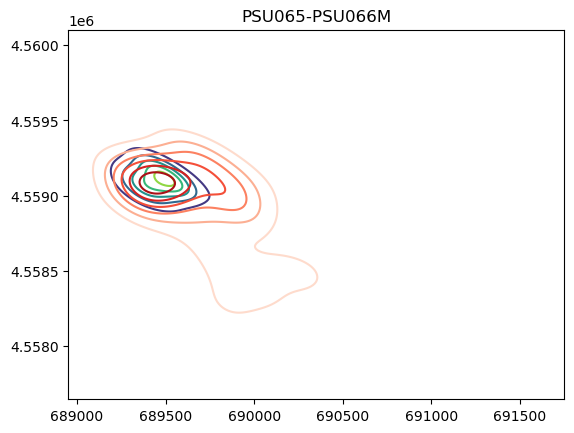

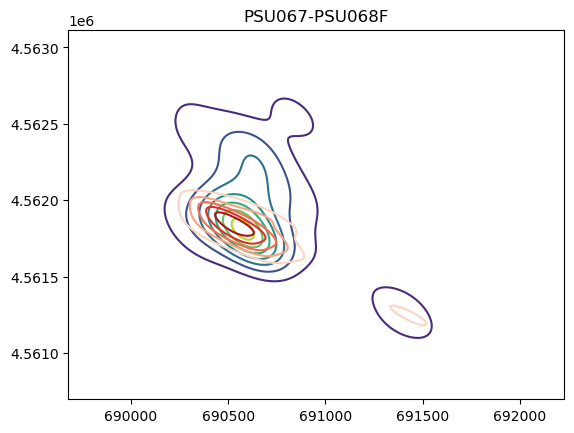

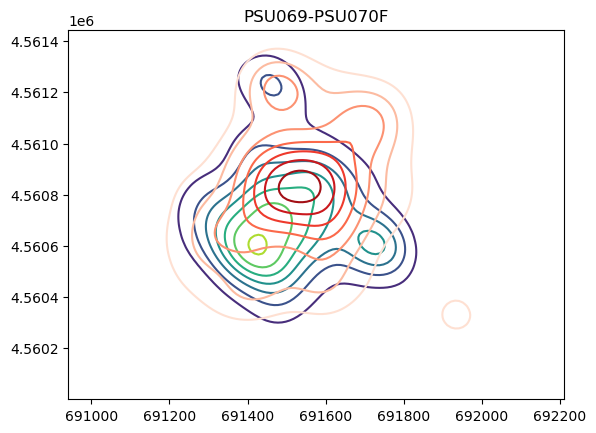

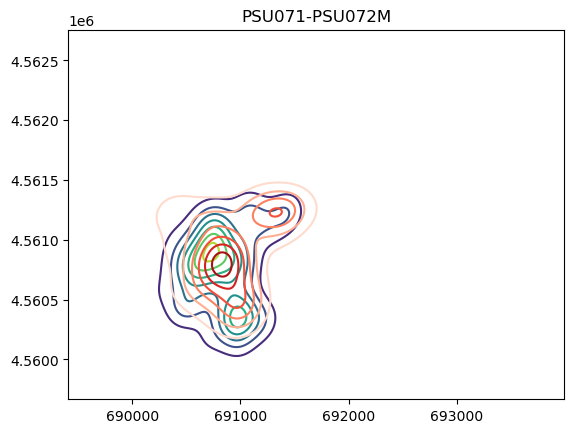

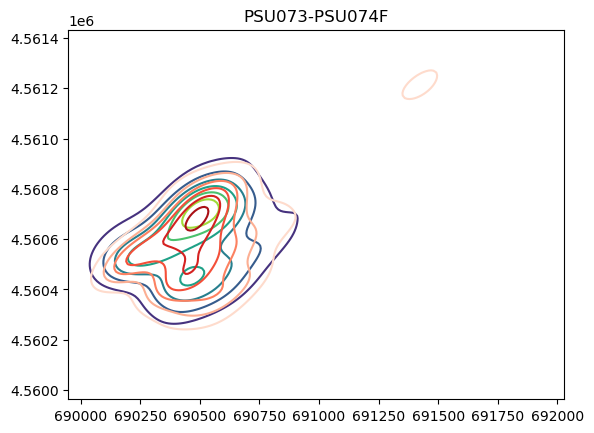

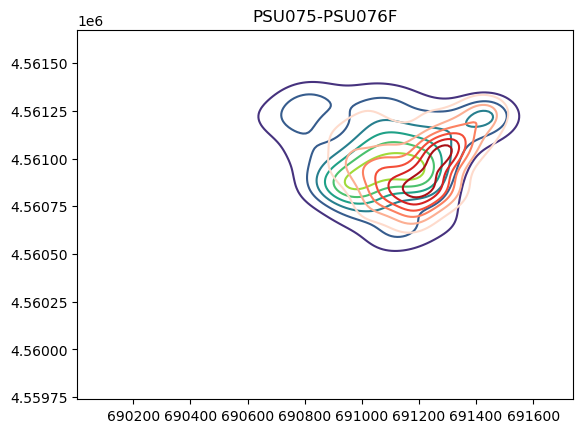

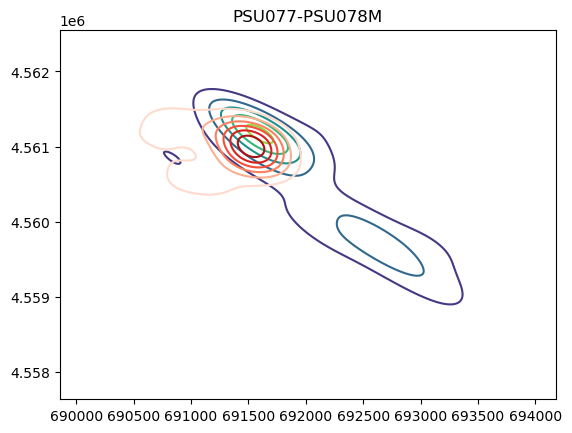

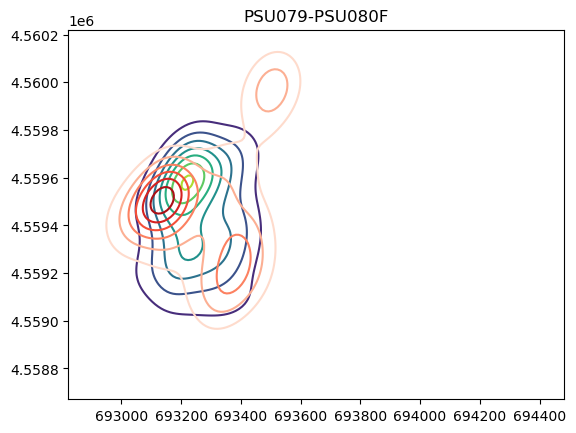

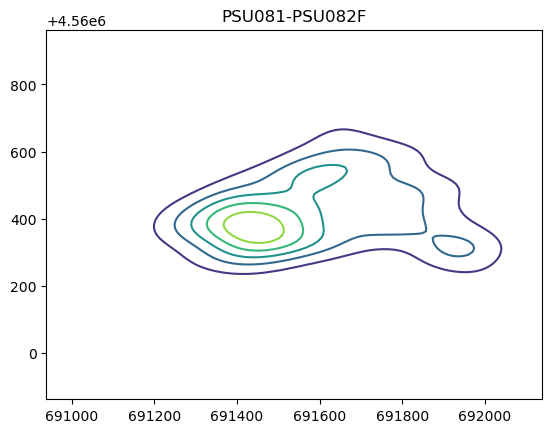

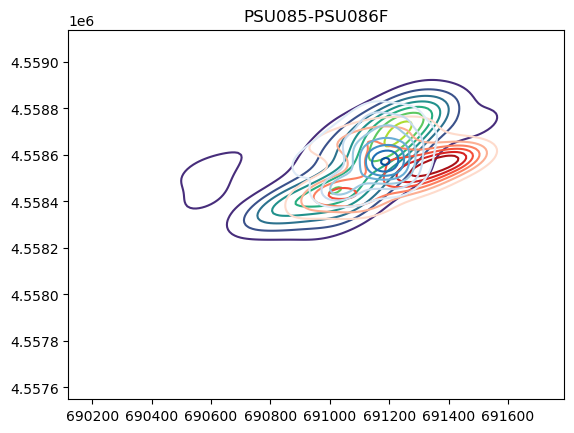

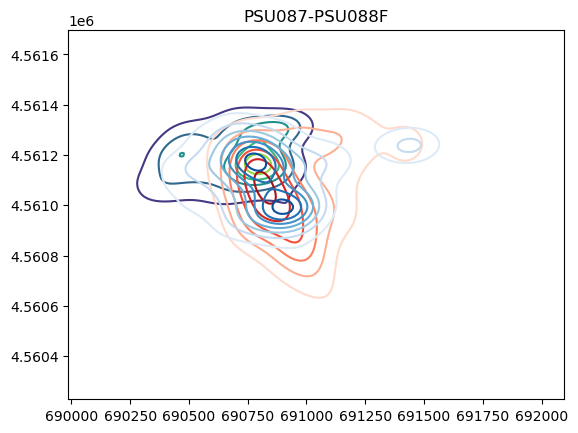

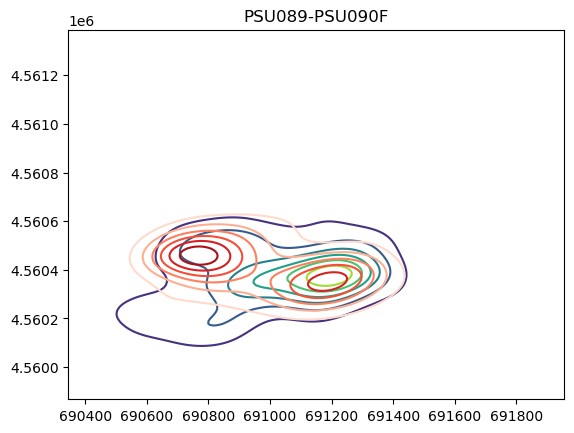

In [75]:
ud_files = glob.glob("../results/host_uds/*pkl")

unq_individuals = np.unique(np.array([os.path.basename(s).split("_")[0] for s in ud_files]))
cmaps = ["viridis", "Reds", "Blues"]

for tid in unq_individuals:
    unq_ids = glob.glob("../results/host_uds/{0}*pkl".format(tid))
    
    plt.figure()
    for j, fl in enumerate(unq_ids):
        uds = pd.read_pickle(fl)
        X, Y, Z = uds['XYZ']
        plt.contour(X, Y, Z, cmap=cmaps[j])
        
    plt.title(tid)

## Step 2: Build the correlation surface

## Step 3: Build a simulated landscape and network

Each landscape has a set of parameters that we need to specify

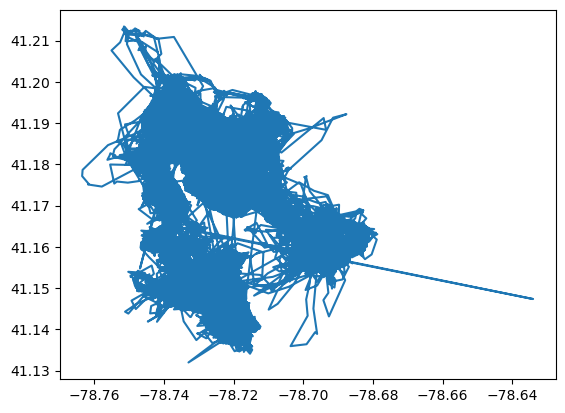

In [76]:
move_dat = pd.read_csv("../data/deer_data/full_movement_data_05292025.csv")
plt.plot(move_dat.longitude, move_dat.latitude)

In [77]:
bounds = (move_dat.x_.min(), move_dat.y_.min(), move_dat.x_.max() - 3000, move_dat.y_.max())
print(np.array(bounds))

[ 687594.80975831 4555883.63312227  695542.92509375 4564886.74626979]


### Assign deer density

In [81]:
import landscape_simulation as land_sim
import geopandas as gpd
import yaml
import importlib
import matplotlib.pyplot as plt
importlib.reload(land_sim)

# Load parameters
with open('model_parameters_pa.yml', 'r') as file:
    model_params = yaml.safe_load(file)

In [86]:
model_params.keys()
model_params['landscape']

dict_keys(['grid_size', 'buffer', 'deer_density', 'bounds', 'forest_shapefile', 'wrap_landscape'])

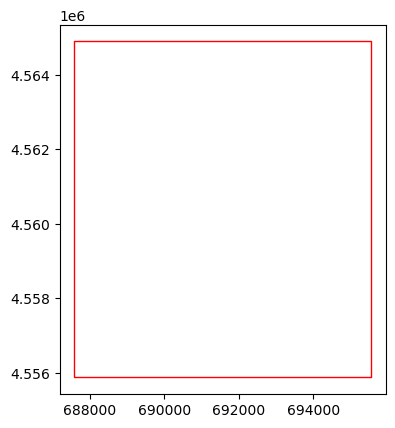

In [95]:
# Model parameters
grid_size = model_params['landscape']['grid_size'] # meters
buffer = model_params['landscape']['buffer'] # meters
bounds = model_params['landscape']['bounds'] # meters

# Load in our property shapefile
#ames = gpd.read_file("../data/spatial_data/ames boundary.shp")

# Make landscape
land = land_sim.Landscape(bounds, grid_size, buffer)
ax = land.plot_landscape()

#ax.plot(move_dat.x_, move_dat.y_, 'o')

A total of 3579 individuals have been assigned to the landscape


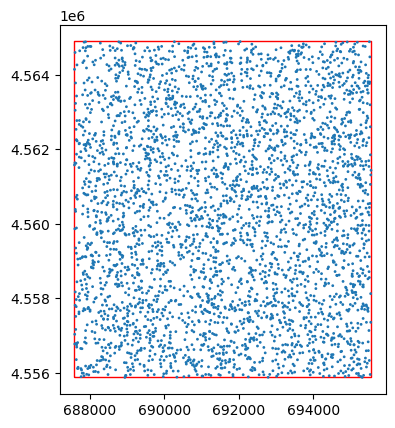

In [99]:
# Assign deer to landscape
deer_density_km2 = 50 #model_params['landscape']['deer_density']
deer_density_m2 = deer_density_km2 / 1000000

land.assign_individuals_randomly_to_landscape(deer_density_m2, None, number=False)
ax = land.plot_landscape(plot_individuals=True)
#ames.plot(ax=ax, color='black')


A total of 3583 individuals have been assigned to the landscape


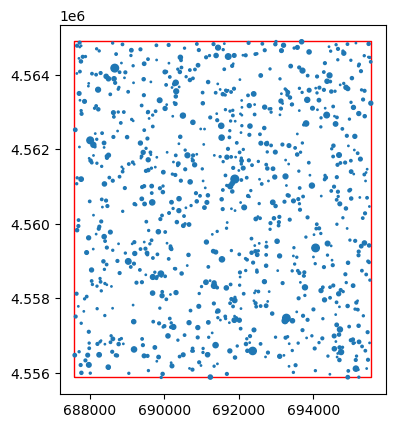

In [103]:
# This should be PA specific
group_size = land_sim.ames_group_size_distributions()
group_size

#plt.plot(group_size['group_size'], group_size['prob'], '-o')
land.assign_individuals_randomly_to_landscape(deer_density_m2, group_size, number=False)
ax = land.plot_landscape(plot_individuals=True, by_group_size=True)